In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [9]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [236]:
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [10]:
%matplotlib notebook

In [106]:
fname = r'/data/new_trap/20191219/NoBead/Shaking/Scan4_0.h5'
bdf1 = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20191223/Bead1/InitialTest/Data27.h5'
bdf2 = BeadDataFile.BeadDataFile(fname=fname)
# fname = r'/home/data_transfer/data_from_windows/20191219/NoBead/Shakeit/Scan4_30.h5'
# bdf3 = BeadDataFile.BeadDataFile(fname=fname)
np.std(bdf1.cant_pos[1]*50)*np.sqrt(2)*2, np.mean(bdf1.cant_pos[0]*50), bdf1.x2.shape

No electrodes data
No cantilever data


(12.650010975811778, 326.25567706945236, (50000,))

<IPython.core.display.Javascript object>


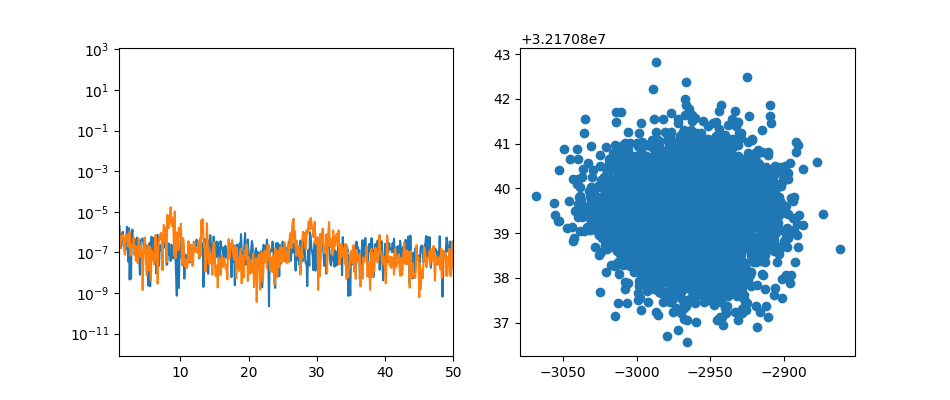

In [107]:
x = bdf2.x2
fft = np.abs(np.fft.rfft(x))**2
freq = np.fft.rfftfreq(len(x), d=1./5000)

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(*bdf1.psd2('x',res=50000))
ax[0].semilogy(*bdf2.psd2('x',res=50000))
# ax[0].semilogy(*bdf3.psd2('x',res=50000))
# ax.semilogy(freq,fft)
ax[0].set(xlim=(1,50))
ax[1].scatter(bdf3.x2[:5000]*50000,0.19*bdf3.x3[:5000]/6)

In [157]:
foldername = r'/home/data_transfer/data_from_windows/20191219/NoBead/Shakeit/'
bdfs = load_dir(dirname=foldername, file_prefix='Scan1')
bdfs2 = load_dir(dirname=foldername, file_prefix='Scan3')

KeyboardInterrupt: 

In [90]:
bdfs[0].x2

array([-0.07002256, -0.06893954, -0.06938485, ..., -0.06968373,
       -0.06927745, -0.07025463])

In [ ]:
amp1 = []
amp2 = []
noise = []
pos = []
for i in range(len(bdfs)):
    freq, fft = bdfs[i].psd2('x')
    amp1.append(fft[freq==12])
    noise.append(fft[freq==20])
    pos.append(404-np.mean(bdfs[i].cant_pos[0]*50))
    freq, fft = bdfs2[i].psd2('x')
    amp2.append(fft[freq==12])

_,ax =plt.subplots()
ax.semilogy(pos,amp1,'.', label='25 micron stroke')
ax.semilogy(pos,amp2,'.', label='10 micron stroke')
ax.semilogy(pos,noise,'.', label='noise')
ax.legend()

In [158]:
foldername = r'/home/data_transfer/data_from_windows/20191219/NoBead/Shakeit/'
bdfs = load_dir(dirname=foldername, file_prefix='Scan4')
bdfs2 = load_dir(dirname=foldername, file_prefix='Scan5')

6  files in folder
6  files loaded
6  files in folder
6  files loaded


<IPython.core.display.Javascript object>


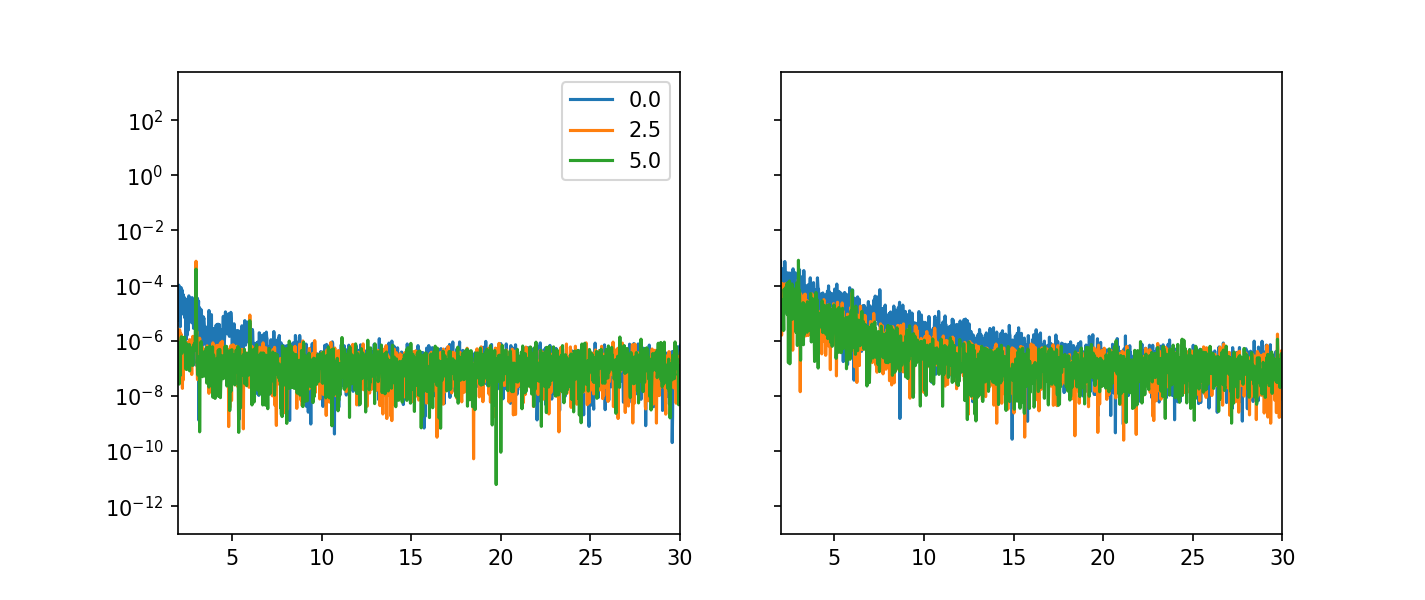

In [172]:
stroke = np.array([0, 0.05, 0.1, 0.25, 0.5, 1])*2*25
i=3
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
[ax[0].semilogy(*bb.psd2('x'), label=s) for bb,s in zip(bdfs[:i],stroke[:i])]
[ax[1].semilogy(*bb.psd2('x'), label=s) for bb,s in zip(bdfs2[:i],stroke[:i])]
ax[0].set(xlim=(2,30))
ax[0].legend()

<IPython.core.display.Javascript object>


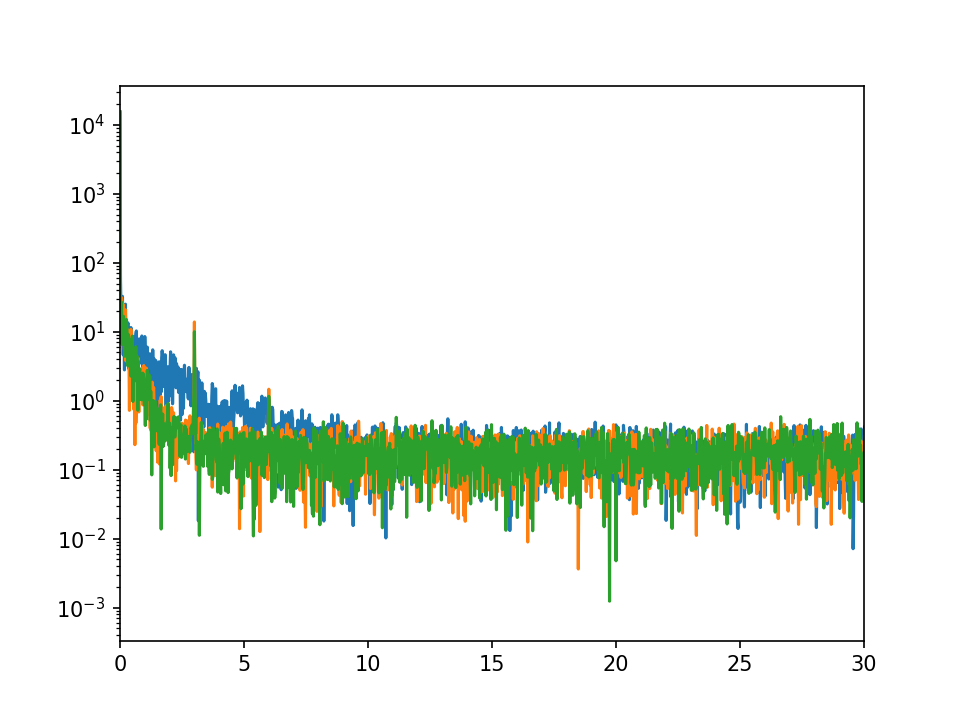

In [231]:
_,ax = plt.subplots()
for i in range(len(bdfs[:3])):
#     freq, fft = bdfs[i].psd2('x')
    x = bdfs[i].x2
    fft = np.abs(np.fft.rfft(x))
    freq = np.fft.rfftfreq(len(x), d=1./5000)
    ax.semilogy(freq, fft)
    ax.set(xlim=(0,30))

In [259]:
amp1 = []
amp2 = []
noise = []

signal = []
noise_std = []
pos = []
for i in range(len(bdfs)):
#     freq, fft = bdfs[i].psd2('x')
    x = bdfs[i].x2
    fft = np.abs(np.fft.rfft(x))
    freq = np.fft.rfftfreq(len(x), d=1./5000)
    amp1.append(fft[freq==6])
    amp2.append(fft[freq==12])
    noise.append(fft[freq==14])
    noise_std.append(np.std(fft[(freq>12)*(freq<15)]))
    pos.append(np.std(bdfs[i].cant_pos[1]*25*2*np.sqrt(2)))
    
    test = force_vs_time(10e-6,0e-6,pos[i]*1e-6,3,"x",100e-6,yuk_or_grav="yuk",alpha=1e8)
    x = test[1]-np.mean(test[1])
    fft = np.abs(np.fft.rfft(x))
    freq = np.fft.rfftfreq(len(x), d=1./5000)
    ax.loglog(freq, fft)
    signal.append(fft[freq==6])

Your choice of separation or height is not existing
Taking 1.0e-05 for separation
Taking 8.5e-21 for height
A separation of 1.00e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.0e-05 for separation
Taking 8.5e-21 for height
A separation of 1.00e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.0e-05 for separation
Taking 8.5e-21 for height
A separation of 1.00e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.0e-05 for separation
Taking 8.5e-21 for height
A separation of 1.00e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.0e-05 for separation
Taking 8.5e-21 for height
A separation of 1.00e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.0e-05 for separation
Taking 8.5e-21 for height
A 

In [260]:
len(bdfs[0].x2)/5000, np.mean(bdfs[0].cant_pos[0]*50), amp1
signal

[array([2.97121106e-19]),
 array([7.66741414e-17]),
 array([3.14529864e-16]),
 array([1.94256473e-15]),
 array([7.57734951e-15]),
 array([2.65718729e-14])]

<IPython.core.display.Javascript object>


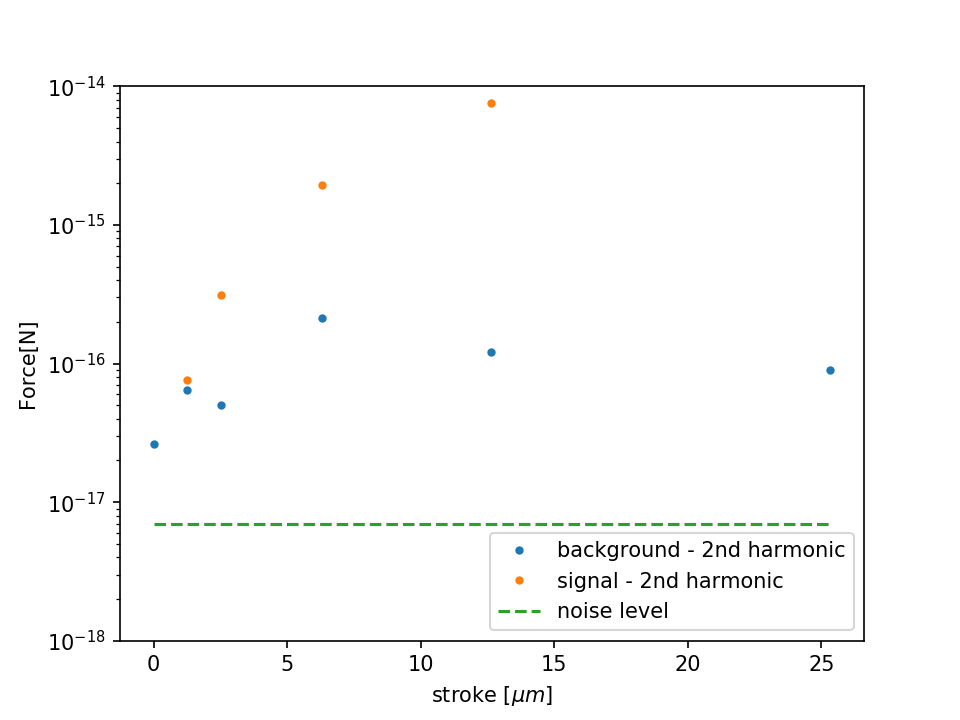

In [261]:
amp1 = np.array(amp1)
amp2 = np.array(amp2)
noise = 0.16
_,ax = plt.subplots()
ax.semilogy(pos,amp1/noise*7e-18,'.', label='background - 2nd harmonic')
ax.semilogy(pos,signal,'.', label='signal - 2nd harmonic')
# ax.semilogy(pos,amp2/noise*1e-17,'.', label='4th harmonic')
ax.semilogy(pos, np.arange(len(pos))*0+7e-18,'--', label='noise level')
ax.set(ylabel='Force[N]', xlabel=r'stroke [$\mu m$]', ylim=(1e-18,1e-14))
ax.legend()

In [140]:
fname = r'/data/new_trap/20191230/Bead1/Shaking/Shaking11_0.h5'
bdf_1 = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20191230/Bead1/Shaking/Shaking36/Shaking36_10.h5'
fname = r'/data/new_trap/20191230/Bead1/Shaking/Shaking35_0.h5'
bdf_2 = BeadDataFile.BeadDataFile(fname=fname)

<IPython.core.display.Javascript object>


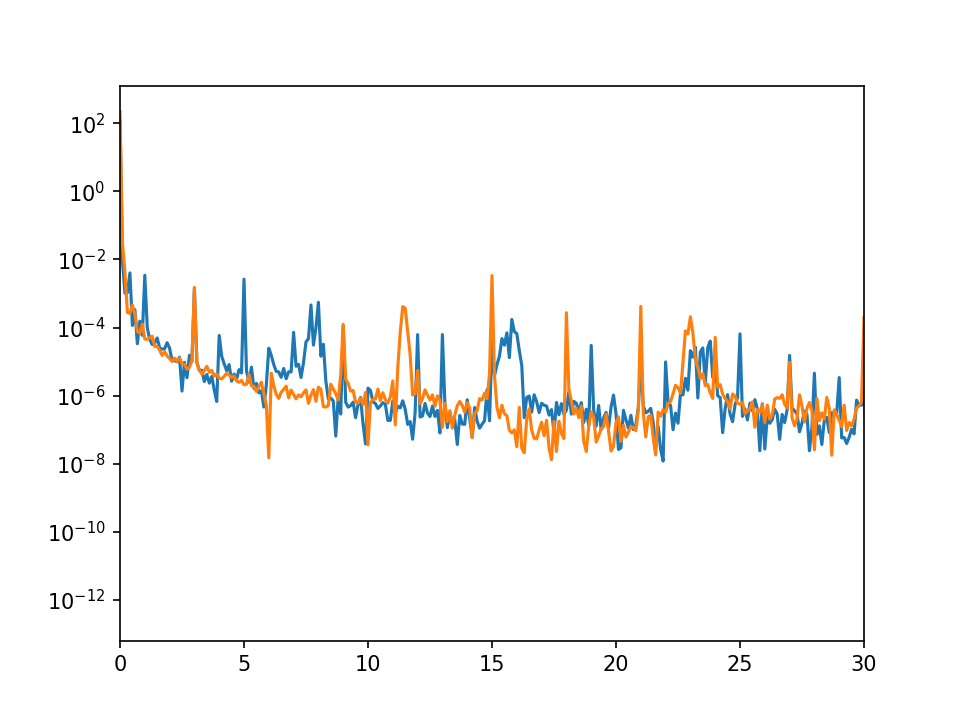

[(0, 30)]

In [142]:
_,ax = plt.subplots()
ax.semilogy(*bdf_1.psd2('x'))
ax.semilogy(*bdf_2.psd2('x'))
ax.set(xlim=(0,30))

In [151]:
foldername = r'/data/new_trap/20191230/Bead1/Shaking/'
bdfs = load_dir(dirname=foldername, file_prefix='Shaking11')

1  files in folder
1  files loaded


<IPython.core.display.Javascript object>


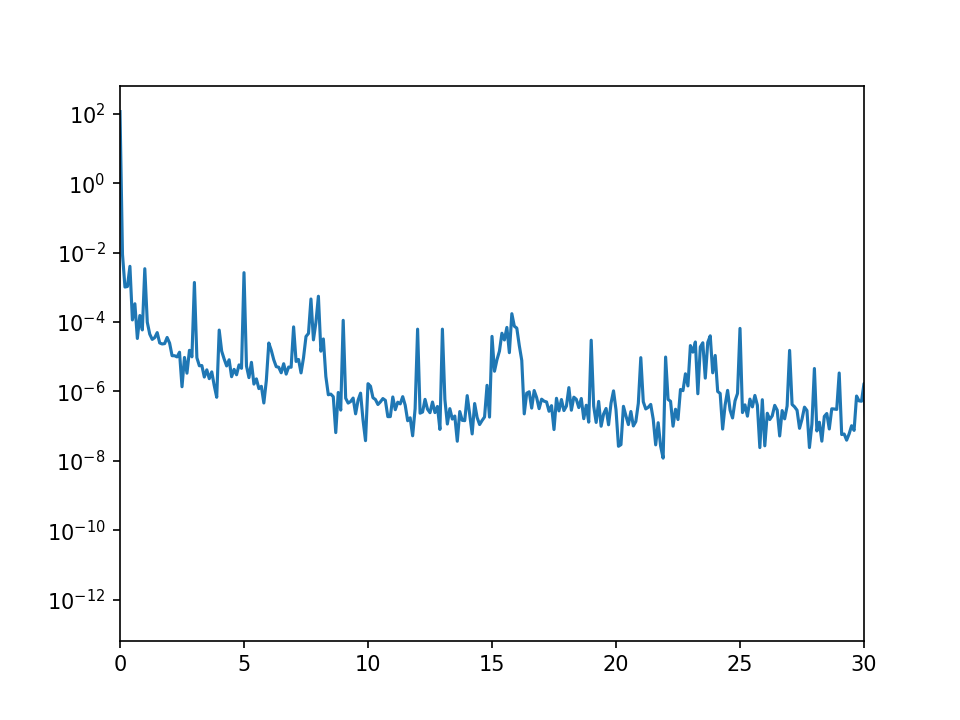

99.55969514349235

In [153]:
_, ax = plt.subplots()
_ = [ax.semilogy(*bb.psd2('x')) for bb in bdfs]
ax.set(xlim=(0,30))
np.std(bdfs[0].cant_pos[1]*50)*np.sqrt(2)*2